# Behaviour cloning

This project is to experiment how to use neural network for regression where

* inputs: images captures when driving
* targets: how we control speed (throttle), steering and break

By fitting on training data, we expect that it can re-clone our behaviour. Let's load some module

In [6]:
# Load matplotib
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')  # emulates the aesthetics of ggplot (of R)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import cv2
import matplotlib.image as mpimg
import pandas as pd
import os

## Dataset
First, we try out the dataset provided by Udacity (can be downloaded from [here](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584f6edd_data/data.zip)). The dataset contains

* images captured by center/left & right camera
* a csv file `driving_log.csv` that contains image files with corresponding `sterring angle, throttle, brake, speed`

Let's load & visualize some samples

                                   center  \
0  IMG/center_2016_12_01_13_30_48_287.jpg   

                                    left  \
0   IMG/left_2016_12_01_13_30_48_287.jpg   

                                    right  steering  throttle  brake     speed  
0   IMG/right_2016_12_01_13_30_48_287.jpg       0.0       0.0    0.0  22.14829  

----------------------------
Number samples 8036
Number of brake 15.82934781


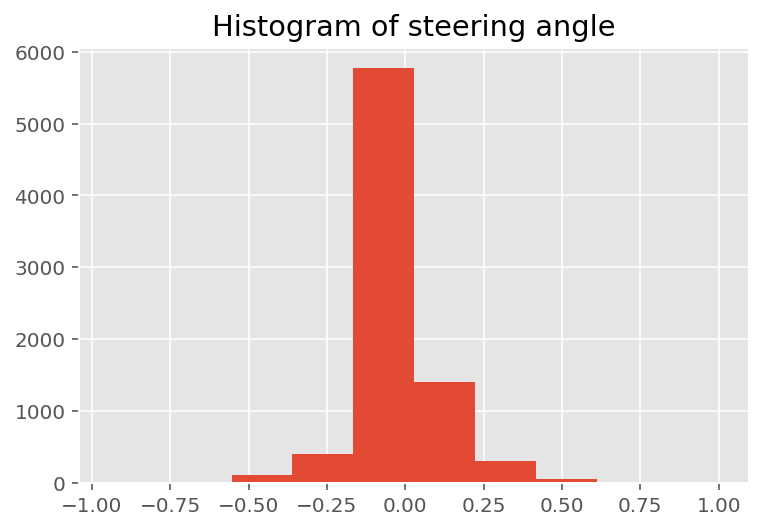

In [40]:
driving_log = pd.read_csv('./data/driving_log.csv')

print(driving_log[:1])
print('\n----------------------------')
print('Number samples  {}'.format(driving_log.shape[0]))
print('Number of brake {}'.format(np.sum(driving_log['brake'])))

# check the distribution of steering angle
_ = plt.hist(driving_log['steering'])
_ = plt.title('Histogram of steering angle')

Looking at above data, we notice

* steering angle is mostly 0
* steering angle is skewed to the right (positive angle)

In [ ]:
def show_img(img, label, ax = None):
    '''
    this function show image & label
    '''
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    
    # draw image
    if label is not None:
        ax.text(0, 0, label, color='k',backgroundcolor='c', fontsize=8)
    
    ax.imshow(img)
    ax.axis('off')
            
def view_row(idx, data = driving_log, figsize=(20,4)):
    fig, axes = plt.subplots(figsize= figsize, nrows=1, ncols=3, sharey=True, sharex=True)
    img_cols = ['left', 'center', 'right']
    for i, ax in enumerate(axes.flatten()):
        img_file = os.path.join('./data', data[img_cols[i]][idx].strip())
        img = mpimg.imread(img_file)
        h, w = img.shape[:2]
        # add a line represents speed + steering
        if i == 1:
            angle = data['steering'][idx]
            speed = data['speed'][idx]*3
            x = int(w/2 + np.sin(angle) * speed)
            y = int(h - np.cos(angle) * speed)
            cv2.line(img,(int(w/2),int(h)),(x, y),(0,255,0),thickness=4)
            
        show_img(img, img_cols[i], ax)
        

Let's visualize some images for training dataset

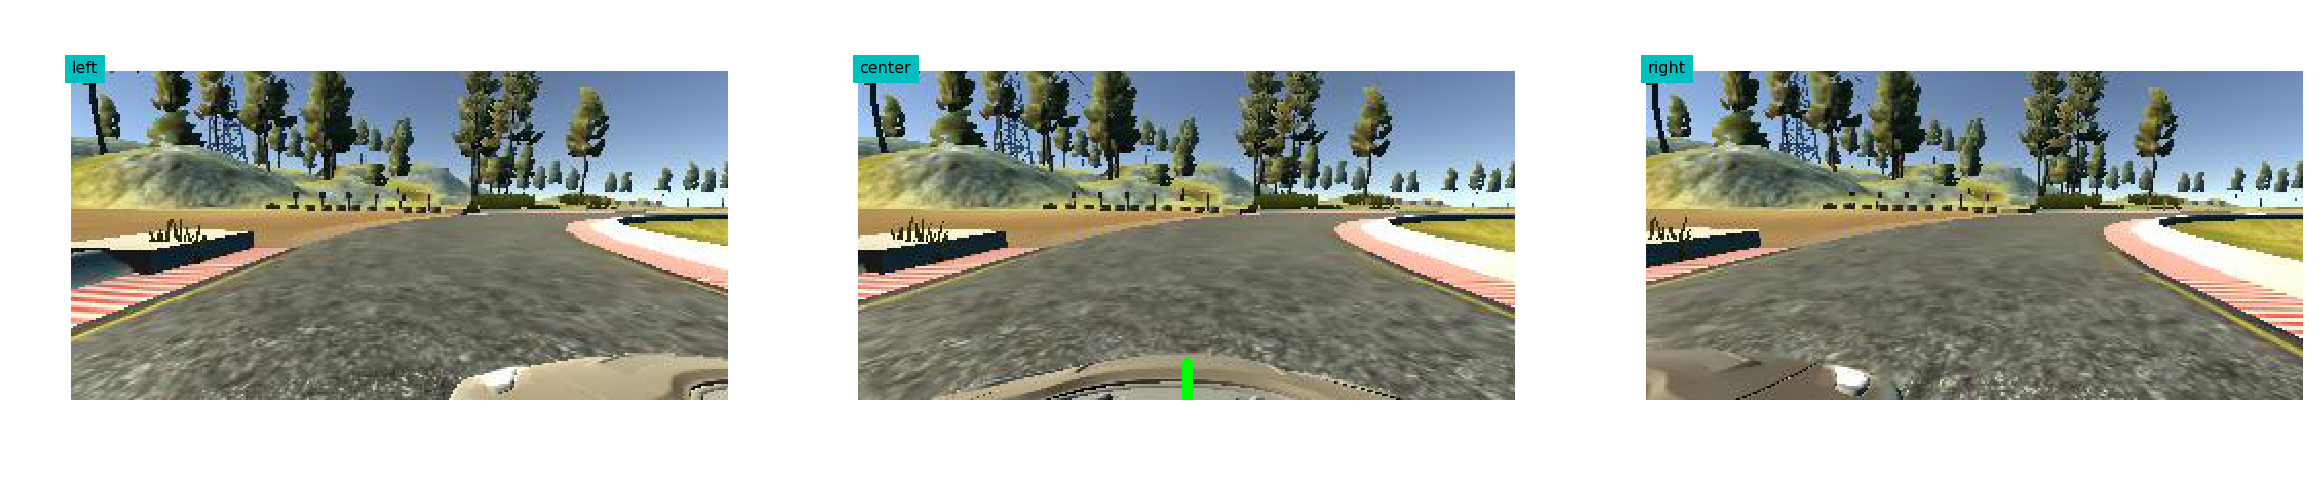

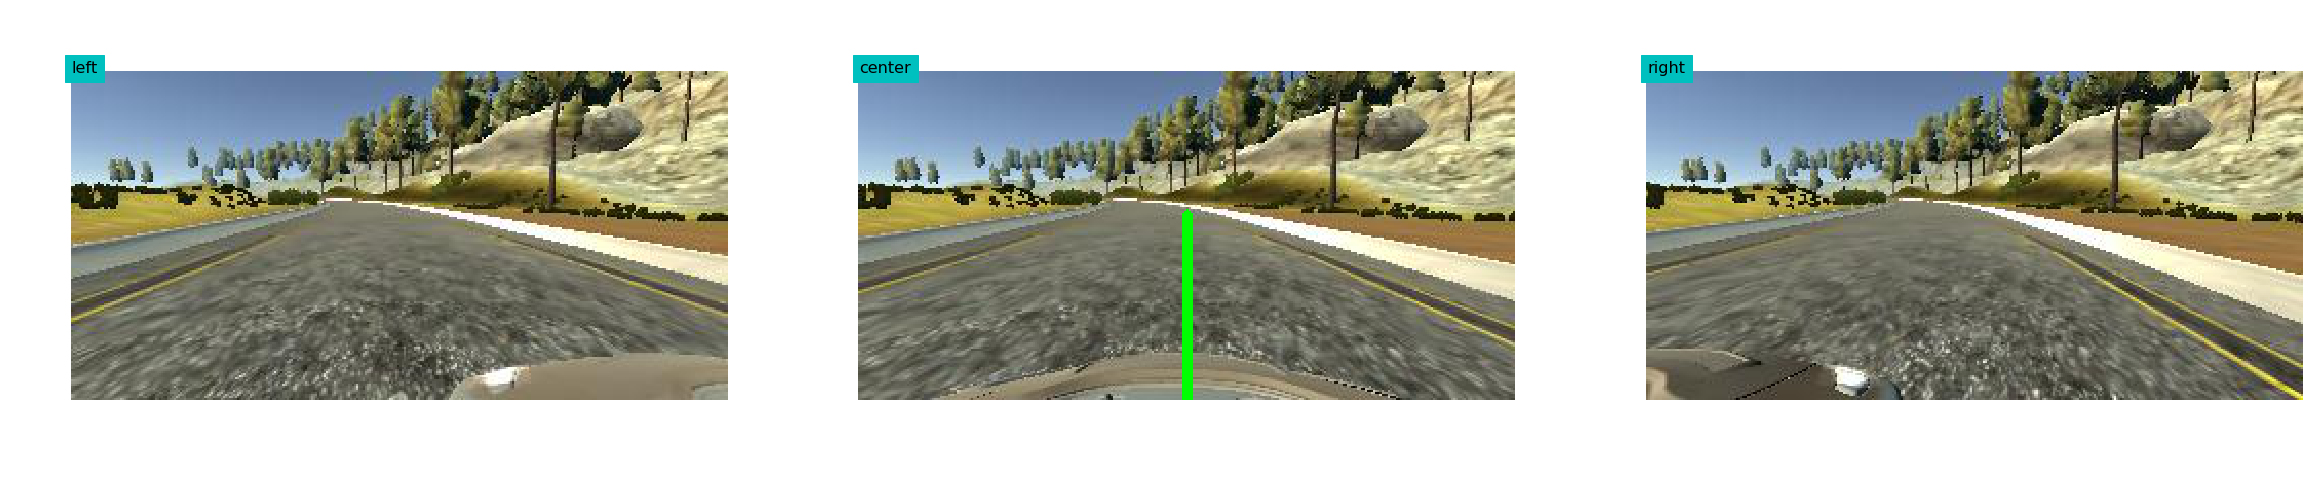

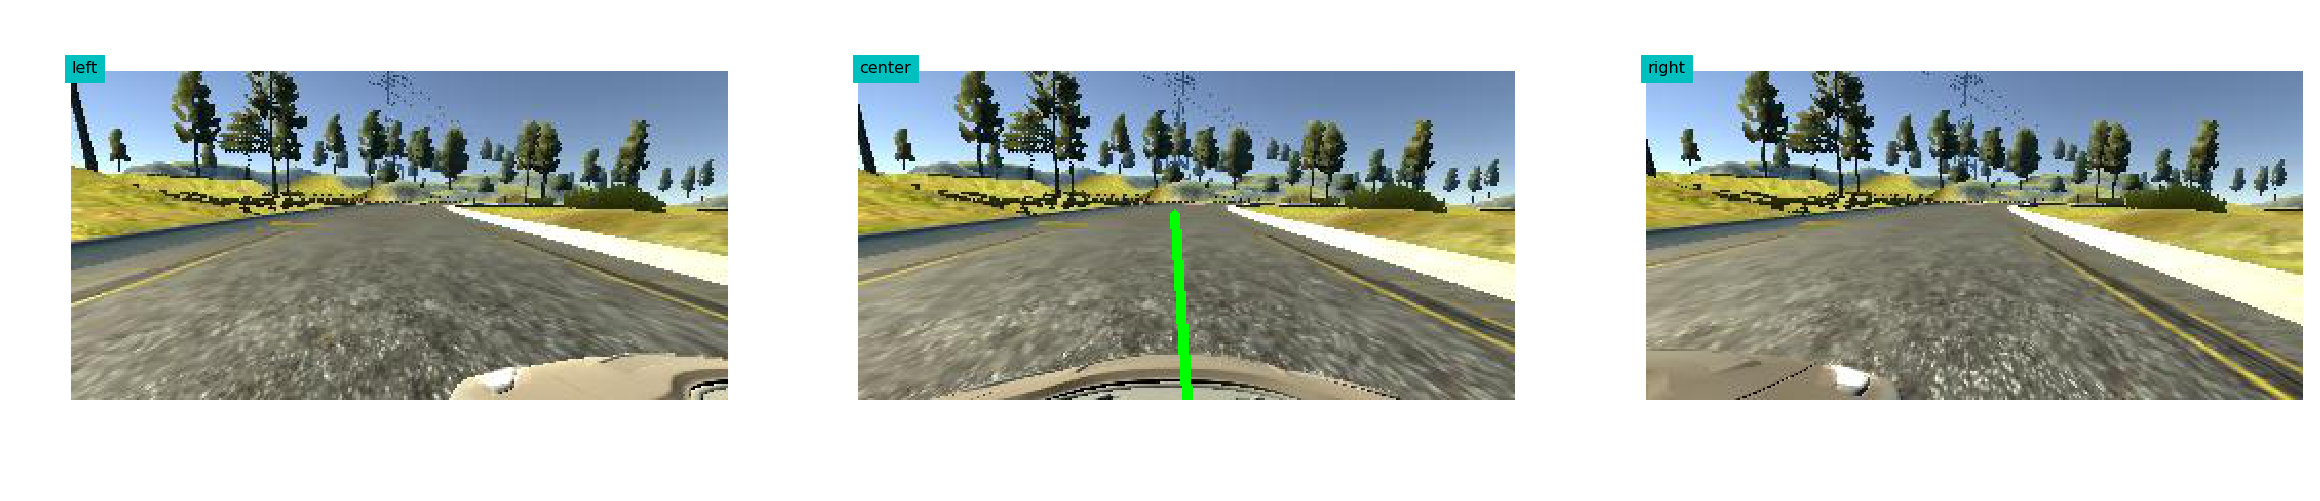

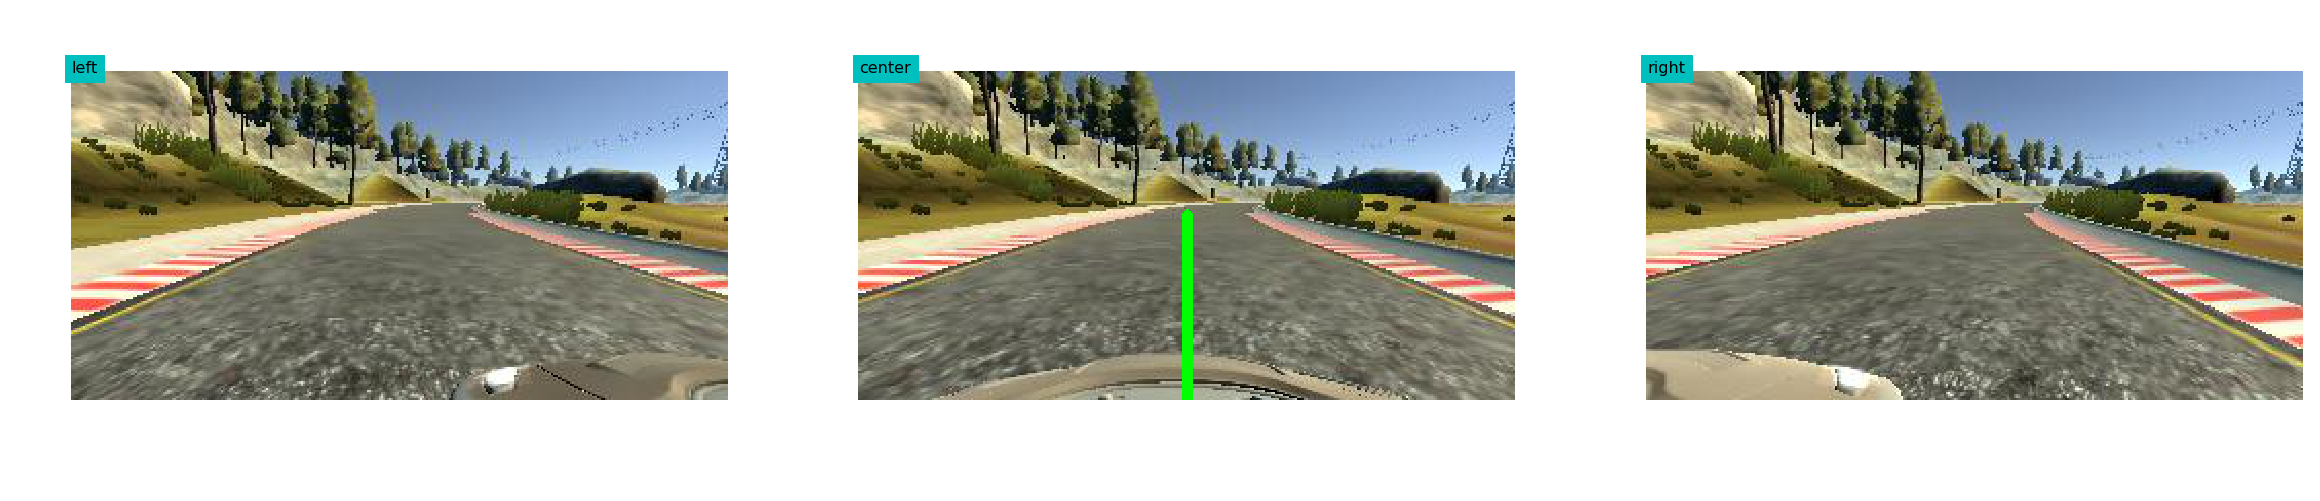

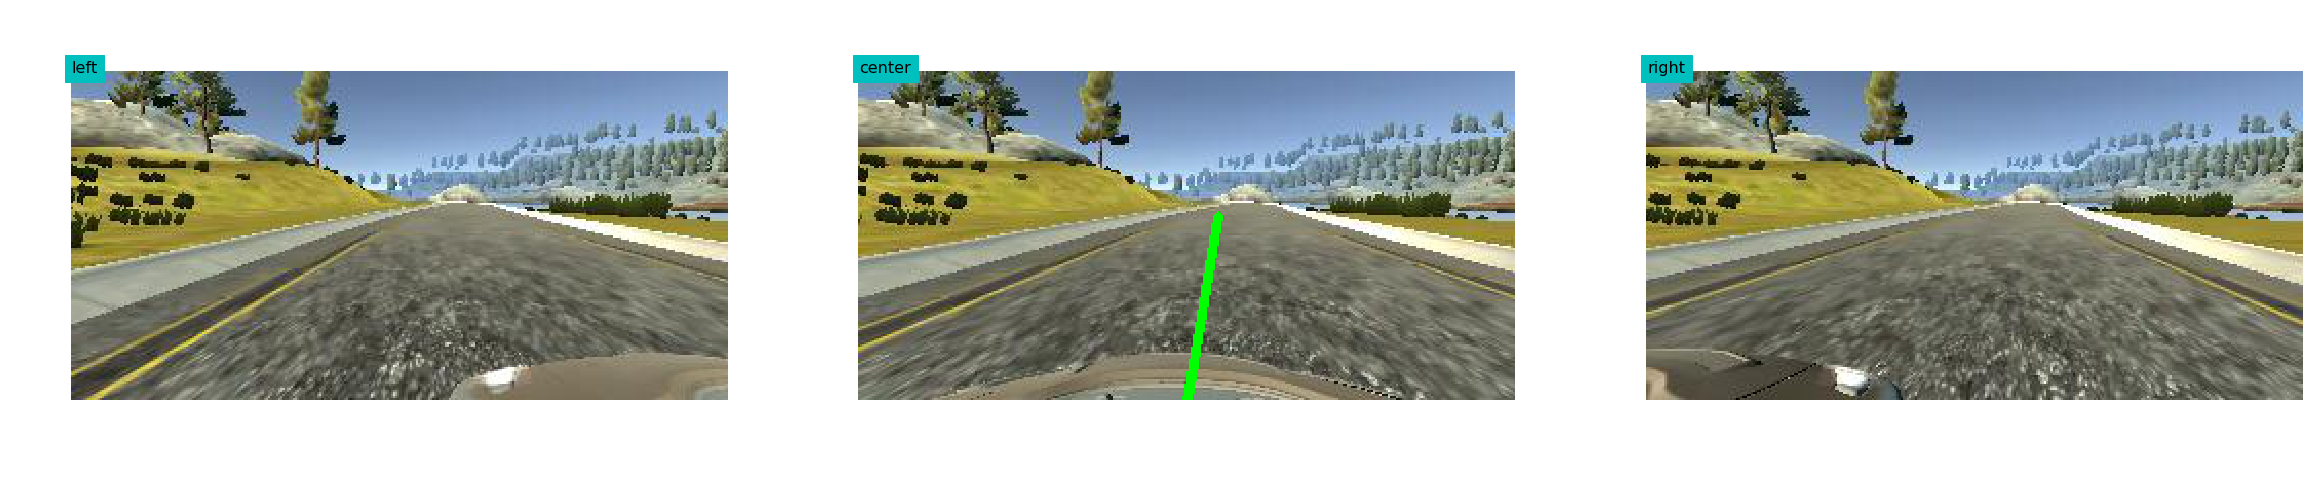

In [46]:
for i in range(5):
    view_row(np.random.randint(driving_log.shape[0]))

Looking at input images, we notice

* the top of images contains tree/sky and the bottom of image contain a part of our car => this is not helpful so we should crop it out (this is also suggested in the project page)